# Case Study #07 - Supervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

### 1. Read the dataset to the python environment.

In [2]:
dataset = pd.read_excel('W11iris.xls')
dataset

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2. Do necessary pre-processing steps.

In [3]:
#label encoding
from sklearn.preprocessing import LabelEncoder
a = ['Classification']
for i in np.arange(len(a)):
    dataset[a[i]] =LabelEncoder().fit_transform(dataset[a[i]])
dataset

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
#finding and filling null values
dataset.info()
col = list(dataset)
for i in col:
    if dataset[i].isna().sum() != 0:
        dataset[i] = dataset[i].fillna(dataset[i].mean())
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

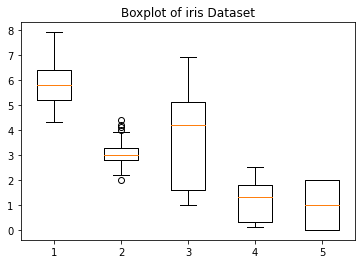

In [5]:
#removing outliers
plt.boxplot(dataset)
plt.title('Boxplot of iris Dataset')
Q1 = np.percentile(dataset['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(dataset['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(dataset['SW'], 75, interpolation='midpoint')
IQR = Q3-Q1
lowL = Q1-1.5*IQR
upL = Q3+1.5*IQR
index = dataset[(dataset['SW']<lowL) | (dataset['SW']>upL)].index
dataset.drop(index, inplace=True)

Text(0.5, 1.0, 'Boxplot of iris dataset after removing outliers')

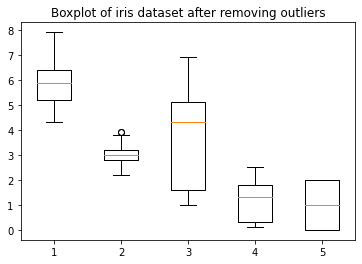

In [6]:
plt.boxplot(dataset)
plt.title('Boxplot of iris dataset after removing outliers')

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [13]:
y = dataset['Classification']
X = dataset.drop('Classification',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
y_train.shape

(116,)

In [12]:
#logistic regression
from sklearn.linear_model import LogisticRegression
LogisticRegression().fit(X_train, y_train)
y_pred = LogisticRegression().predict(X_test)
y_pred

/home/tomsbastin97/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_test